In [1]:
from fastbook import *
from fastai.vision.widgets import *

In [2]:
path = Path('training_2_subset');path

Path('training_2_subset')

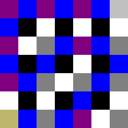

In [4]:
image = Image.open(path/'solved/grid1000.png')
image.to_thumb(128,128)

In [5]:
grid_states = 'solved', 'finished', 'unfinished'

## Preparing our data

In [6]:
img_files = get_image_files(path)
img_files

(#1435) [Path('training_2_subset/solved/grid76.png'),Path('training_2_subset/solved/grid77.png'),Path('training_2_subset/solved/grid174.png'),Path('training_2_subset/solved/grid181.png'),Path('training_2_subset/solved/grid236.png'),Path('training_2_subset/solved/grid1339.png'),Path('training_2_subset/solved/grid1340.png'),Path('training_2_subset/solved/grid954.png'),Path('training_2_subset/solved/grid1317.png'),Path('training_2_subset/solved/grid119.png')...]

In [7]:
grids =  DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [8]:
dls = grids.dataloaders(path)

## What some grids look like

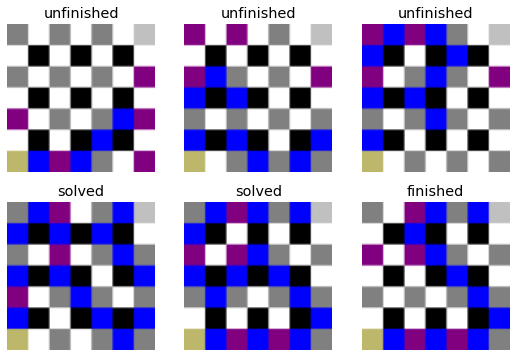

In [9]:
dls.valid.show_batch(max_n = 6, nrows=2)

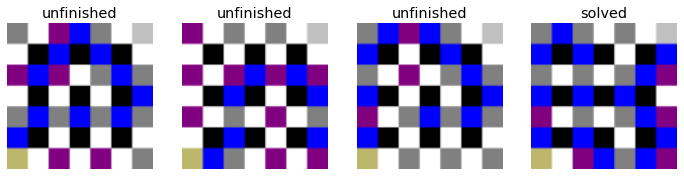

In [10]:
dls.train.show_batch(max_n=4, nrows=1)

In [ ]:
# # #augementation
# grids = grids.new(item_tfms=DihedralItem(p=1.), batch_tfms=aug_transforms(mult=2))
# dls = grids.dataloaders(path)
# dls.train.show_batch(max_n=4, nrows=1, unique=True)

## Training with our dataset

In [11]:
grids =  DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
dls = grids.dataloaders(path)

In [12]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.420633,0.683949,0.278746,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.256174,0.140183,0.066202,00:06
1,0.163575,0.090198,0.031359,00:06
2,0.114049,0.143431,0.038328,00:06
3,0.080617,0.119884,0.034843,00:06


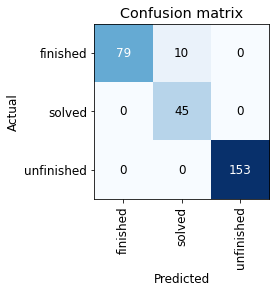

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [14]:
learn.export()

In [15]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [18]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

['finished', 'solved', 'unfinished']

## Making classifications based on data it has never seen before

In [20]:
prediction1 = learn_inf.predict('test_image_subsets/solved/grid1000.png') #3x3 grid and it was trained with 3x3
prediction1

('solved', tensor(1), tensor([2.3466e-01, 7.6534e-01, 3.3989e-07]))

In [19]:
prediction2 = learn_inf.predict('test_image_subsets/unfinished/grid16.png') #2x2 grid but it was trained with 3x3
prediction2

('solved', tensor(1), tensor([0.0277, 0.8471, 0.1252]))

In [21]:
prediction3 = learn_inf.predict('test_image_subsets/unfinished/grid10.png') #3x3 grid and it was trained with 3x3
prediction3

('unfinished', tensor(2), tensor([3.6178e-06, 1.9892e-05, 9.9998e-01]))